# **Análisis exploratorio Avance 1 Proyecto**

#### Integrantes
- *Santiago Cassiano Rozo*
- *Fabian Camilo Castro Lozano*
- *David Jose Leon Aroca*


## Importar las librerias que se utilizaran a lo largo del analisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy.stats import chi2
from google.colab import drive

## Información general del conjunto de datos
**Conjunto de Datos: Bank Marketing **

*   Se encuentra en el repositorio UCI de Machine Learning https://archive.ics.uci.edu/dataset/222/bank+marketing, corresponde al archivo "bank-full.csv".  
*    45211 observaciones
*    17 variables, 1 es la clase
*     La clase es la variable "y", la cual indica si la persona adquirio el deposito a plazo ofrecido por el banco o no.
*    Hay 39922 registros con la clase "no" y 5289 registros con la clase "yes".

### Acceso al conjunto de datos a traves de la carpeta de google drive de los miembros del grupo

In [2]:
#Acceso a los contenidos de google drive del usuario
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Acceso al conjunto de datos en el google drive del equipo
bank_df = pd.read_csv("/content/gdrive/Shareddrives/Minería de datos/Proyecto/I. Dataset/bank-full.csv", sep=";")
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Verificacion del tamaño del dataframe y tipo de dato de cada columna

In [4]:
print(bank_df.shape)
print(bank_df.info())

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


### Verificar si existen datos con valor null en el dataframe

Cabe resaltar que aunque no existan valores null, en el conjunto de datos hay valores desconocidos, que se marcan con la etiqueta "unknown".

In [5]:
bank_df.isnull().values.any()

False

### Calcular la frecuencia de personas que si aceptaron el deposito a plazo y las que no

In [6]:
bank_df.groupby("y").size()

y
no     39922
yes     5289
dtype: int64

### Calcular la frecuencia porcentual de personas que si aceptaron el deposito a plazo y las que no

In [7]:
bank_df.groupby("y").size()/bank_df.shape[0]

y
no     0.883015
yes    0.116985
dtype: float64

## Medidas de tendencia central

### Medias

Cabe resaltar que la media del atributo pdays se calcula sin tener en cuenta los valores de -1 en ese atributo.

In [8]:
print("\nPor variables individuales")
print(bank_df.loc[:,["age","balance","duration","campaign"]].mean())
print(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous"]].mean())
print("\nPor grupos:")
print(bank_df.loc[:,["age","balance","duration","campaign","y"]].groupby("y").mean())
print(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous","y"]].groupby("y").mean())


Por variables individuales
age           40.936210
balance     1362.272058
duration     258.163080
campaign       2.763841
dtype: float64
pdays       224.577692
previous      3.177546
dtype: float64

Por grupos:
           age      balance    duration  campaign
y                                                
no   40.838986  1303.714969  221.182806  2.846350
yes  41.670070  1804.267915  537.294574  2.141047
          pdays  previous
y                        
no   234.191436  3.156014
yes  192.521785  3.249344


### Medianas

Cabe resaltar que la mediana del atributo pdays se calcula sin tener en cuenta los valores de -1 en ese atributo.

In [9]:
print("\nPor variables individuales")
print(bank_df.loc[:,["age","balance","duration","campaign"]].median())
print(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous"]].median())
print("\nPor grupos:")
print(bank_df.loc[:,["age","balance","duration","campaign","y"]].groupby("y").median())
print(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous","y"]].groupby("y").median())


Por variables individuales
age          39.0
balance     448.0
duration    180.0
campaign      2.0
dtype: float64
pdays       194.0
previous      2.0
dtype: float64

Por grupos:
      age  balance  duration  campaign
y                                     
no   39.0    417.0     164.0       2.0
yes  38.0    733.0     426.0       2.0
     pdays  previous
y                   
no   232.0       2.0
yes  181.0       2.0


### Modas


In [10]:
print("Moda por atributos individuales")
print(bank_df.loc[:,["job","marital","education","default","housing","loan","contact","day","month","poutcome"]].mode())
print("\nModa por grupos")
print(bank_df.loc[:,["job","marital","education","default","housing","loan","contact","day","month","poutcome","y"]].groupby("y").agg(pd.Series.mode))

Moda por atributos individuales
           job  marital  education default housing loan   contact  day month  \
0  blue-collar  married  secondary      no     yes   no  cellular   20   may   

  poutcome  
0  unknown  

Moda por grupos
             job  marital  education default housing loan   contact  day  \
y                                                                          
no   blue-collar  married  secondary      no     yes   no  cellular   20   
yes   management  married  secondary      no      no   no  cellular   30   

    month poutcome  
y                   
no    may  unknown  
yes   may  unknown  


## Percentiles

Cabe resaltar que los percentiles del atributo pdays se calcula sin tener en cuenta los valores de -1 en ese atributo.

In [11]:
print("Percentiles por grupos:")
quantile_dict = []
for i in np.arange(0, 1.01, 0.01):
    #print((i*100).round(1),"%:",bank_df['balance'].quantile(i).round(2))
    quantile_dict.append({**{"Quantil": f"{(i*100).round(1)}%"}, **dict(bank_df.loc[:,["age","balance","duration","campaign"]].quantile(i)), **dict(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous"]].quantile(i))})
    print(f"\nPercentil:{(i*100).round(2)}%\n" , bank_df.loc[:,["age","balance","duration","campaign","y"]].groupby("y").quantile(i))
print("\nPercentiles por variables individuales:")
print(pd.DataFrame(quantile_dict))

Percentiles por grupos:

Percentil:0.0%
       age  balance  duration  campaign
y                                     
no   18.0  -8019.0       0.0       1.0
yes  18.0  -3058.0       8.0       1.0

Percentil:1.0%
       age  balance  duration  campaign
y                                     
no   24.0  -649.58     10.00       1.0
yes  21.0  -411.24     84.88       1.0

Percentil:2.0%
       age  balance  duration  campaign
y                                     
no   25.0  -456.00      15.0       1.0
yes  23.0  -233.72      97.0       1.0

Percentil:3.0%
       age  balance  duration  campaign
y                                     
no   26.0  -341.00      20.0       1.0
yes  24.0   -69.72     110.0       1.0

Percentil:4.0%
       age  balance  duration  campaign
y                                     
no   26.0   -260.0      25.0       1.0
yes  25.0      0.0     121.0       1.0

Percentil:5.0%
       age  balance  duration  campaign
y                                     
no   27.0   -196

## Cuartiles


Cabe resaltar que los cuartiles del atributo pdays se calcula sin tener en cuenta los valores de -1 en ese atributo.

In [12]:
print("Cuartiles por grupos:")
quantile_dict = []
for i in np.arange(0, 1.25, 0.25):
    quantile_dict.append({**{"Quantil": f"{i*100}%"}, **dict(bank_df.loc[:,["age","balance","duration","campaign"]].quantile(i)), **dict(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous"]].quantile(i))})
    #quantile_dict_group_by.append({**{"Quantil": f"{i*100}%"}, **dict(bank_df.loc[:,["age","balance","duration","campaign","y"]].groupby("y").quantile(i)), **dict(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous","y"]].groupby("y").quantile(i))})
    print(f"\nCuartil:{(i*100).round(2)}%\n" , bank_df.loc[:,["age","balance","duration","campaign","y"]].groupby("y").quantile(i))

print("\nCuartiles por variables individuales:")
print(pd.DataFrame(quantile_dict))
#print(pd.DataFrame(quantile_dict_group_by))

Cuartiles por grupos:

Cuartil:0.0%
       age  balance  duration  campaign
y                                     
no   18.0  -8019.0       0.0       1.0
yes  18.0  -3058.0       8.0       1.0

Cuartil:25.0%
       age  balance  duration  campaign
y                                     
no   33.0     58.0      95.0       1.0
yes  31.0    210.0     244.0       1.0

Cuartil:50.0%
       age  balance  duration  campaign
y                                     
no   39.0    417.0     164.0       2.0
yes  38.0    733.0     426.0       2.0

Cuartil:75.0%
       age  balance  duration  campaign
y                                     
no   48.0   1345.0     279.0       3.0
yes  50.0   2159.0     725.0       3.0

Cuartil:100.0%
       age   balance  duration  campaign
y                                      
no   95.0  102127.0    4918.0      63.0
yes  95.0   81204.0    3881.0      32.0

Cuartiles por variables individuales:
  Quantil   age   balance  duration  campaign  pdays  previous
0    0.0%  1

## Medidas de dispersión

### Desviación estándar

In [13]:
print("\nPor variables individuales")
print(bank_df.loc[:,["age","balance","duration","campaign"]].std())
print(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous"]].std())
print("\nPor grupos:")
print(bank_df.loc[:,["age","balance","duration","campaign","y"]].groupby("y").std())
print(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous","y"]].groupby("y").std())


Por variables individuales
age           10.618762
balance     3044.765829
duration     257.527812
campaign       3.098021
dtype: float64
pdays       115.344035
previous      4.560820
dtype: float64

Por grupos:
           age      balance    duration  campaign
y                                                
no   10.172662  2974.195473  207.383237  3.212767
yes  13.497781  3501.104777  392.525262  1.921826
          pdays  previous
y                        
no   111.022439  4.861754
yes  123.441816  3.368521


### Desviación media absoluta

In [14]:
from scipy.stats import trim_mean
from numpy import mean, absolute
import statistics
def aad(x):
   a = mean(absolute(x - statistics.median(x)))
   return a

print("\nPor variables individuales")
print(bank_df.loc[:,["age","balance","duration","campaign"]].apply(aad))
print(bank_df.loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous"]].apply(aad))
print("\nPor grupos:")
print("Yes:")
print(bank_df.groupby("y")[["age","balance","duration","campaign"]].get_group("yes").apply(aad))
print(bank_df.groupby("y").get_group("yes").loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous"]].apply(aad))
print("No:")
print(bank_df.groupby("y")[["age","balance","duration","campaign"]].get_group("no").apply(aad))
print(bank_df.groupby("y").get_group("no").loc[bank_df.loc[:,"pdays"] != -1, ["pdays","previous"]].apply(aad))



Por variables individuales
age            8.616354
balance     1289.234036
duration     157.056314
campaign       1.539935
dtype: float64
pdays       94.376892
previous     1.848977
dtype: float64

Por grupos:
Yes:
age           10.690301
balance     1578.683305
duration     288.682360
campaign       1.109472
dtype: float64
pdays       87.339108
previous     1.861417
dtype: float64
No:
age            8.338911
balance     1246.453710
duration     128.148640
campaign       1.596964
dtype: float64
pdays       93.787783
previous     1.845246
dtype: float64


## Estadísticas multivariadas

### Covarianza


In [15]:
print(bank_df.loc[:,["age","balance","duration","campaign","pdays","previous"]].cov())

                  age       balance      duration    campaign         pdays  \
age        112.758107  3.161477e+03    -12.711716    0.156601    -25.260550   
balance   3161.476700  9.270599e+06  16905.750545 -137.513232   1047.321715   
duration   -12.711716  1.690575e+04  66320.574090  -67.471794    -40.349073   
campaign     0.156601 -1.375132e+02    -67.471794    9.597733    -27.492386   
pdays      -25.260550  1.047322e+03    -40.349073  -27.492386  10025.765774   
previous     0.031512  1.169395e+02      0.713654   -0.234459    104.899902   

            previous  
age         0.031512  
balance   116.939527  
duration    0.713654  
campaign   -0.234459  
pdays     104.899902  
previous    5.305841  


### Correlaciones

In [16]:
print(bank_df.loc[:,["age","balance","duration","campaign","pdays","previous"]].corr())

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.021560 -0.014578  0.003435  0.016674
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674  0.001203 -0.032855  0.454820  1.000000


## Tablas de contingencia

##### Variable Job vs variable y

In [17]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['job'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['job'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

 Tabla con proporciones
y                    no       yes
job                              
admin.         0.113722  0.119304
blue-collar    0.226041  0.133863
entrepreneur   0.034167  0.023256
housemaid      0.028330  0.020609
management     0.204323  0.245982
retired        0.043785  0.097561
self-employed  0.034868  0.035356
services       0.094810  0.069767
student        0.016758  0.050860
technician     0.169255  0.158820
unemployed     0.027579  0.038192
unknown        0.006362  0.006428


##### Variable Marital vs variable y

In [18]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['marital'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['marital'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912

 Tabla con proporciones
y               no       yes
marital                     
divorced  0.114849  0.117603
married   0.612670  0.520892
single    0.272481  0.361505


Variable education vs variable y

In [19]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['education'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['education'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252

 Tabla con proporciones
y                no       yes
education                    
primary    0.156806  0.111741
secondary  0.519814  0.463226
tertiary   0.283177  0.377387
unknown    0.040203  0.047646


##### Variable default vs variable y

In [20]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['default'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['default'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y           no   yes
default             
no       39159  5237
yes        763    52

 Tabla con proporciones
y              no       yes
default                    
no       0.980888  0.990168
yes      0.019112  0.009832


##### Variable housing vs variable y

In [21]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['housing'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['housing'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y           no   yes
housing             
no       16727  3354
yes      23195  1935

 Tabla con proporciones
y              no       yes
housing                    
no       0.418992  0.634146
yes      0.581008  0.365854


##### Variable loan vs variable y

In [22]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['loan'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['loan'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y        no   yes
loan             
no    33162  4805
yes    6760   484

 Tabla con proporciones
y          no       yes
loan                   
no    0.83067  0.908489
yes   0.16933  0.091511


##### Variable contact vs variable y

In [23]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['contact'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['contact'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y             no   yes
contact               
cellular   24916  4369
telephone   2516   390
unknown    12490   530

 Tabla con proporciones
y                no       yes
contact                      
cellular   0.624117  0.826054
telephone  0.063023  0.073738
unknown    0.312860  0.100208


##### Variable month vs variable y

In [24]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['month'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['month'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y         no  yes
month            
apr     2355  577
aug     5559  688
dec      114  100
feb     2208  441
jan     1261  142
jul     6268  627
jun     4795  546
mar      229  248
may    12841  925
nov     3567  403
oct      415  323
sep      310  269

 Tabla con proporciones
y            no       yes
month                    
apr    0.058990  0.109094
aug    0.139247  0.130081
dec    0.002856  0.018907
feb    0.055308  0.083381
jan    0.031587  0.026848
jul    0.157006  0.118548
jun    0.120109  0.103233
mar    0.005736  0.046890
may    0.321652  0.174891
nov    0.089349  0.076196
oct    0.010395  0.061070
sep    0.007765  0.050860


##### Variable poutcome vs variable y

In [25]:
print("\n Tabla con frecuencias")
tabla_contingencia = pd.crosstab(bank_df['poutcome'],bank_df['y'])
print(tabla_contingencia)

print("\n Tabla con proporciones")
tabla_contingencia = pd.crosstab(bank_df['poutcome'],bank_df['y'], normalize="columns")
print(tabla_contingencia)


 Tabla con frecuencias
y            no   yes
poutcome             
failure    4283   618
other      1533   307
success     533   978
unknown   33573  3386

 Tabla con proporciones
y               no       yes
poutcome                    
failure   0.107284  0.116846
other     0.038400  0.058045
success   0.013351  0.184912
unknown   0.840965  0.640197


## Histogramas

##### Variable age

<Axes: >

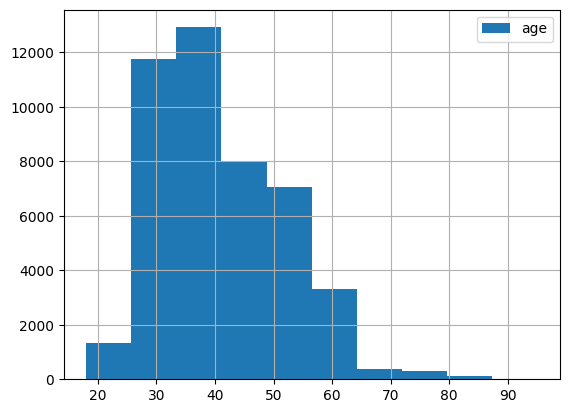

In [26]:
bank_df['age'].hist(legend = True)

#### Variable balance

Histograma incluyendo todos los datos de la variable

<Axes: >

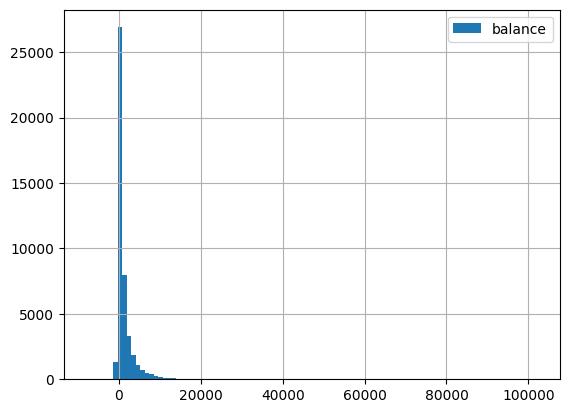

In [27]:
bank_df['balance'].hist(bins = 100, legend = True)

Histograma descartando los valores extremos

<Axes: >

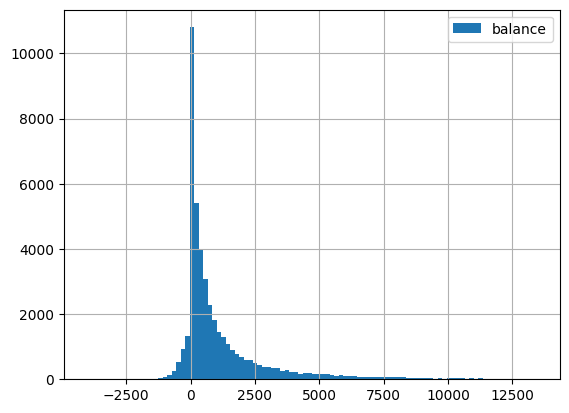

In [28]:
bank_df.loc[(bank_df.loc[:,"balance"] < 13471) & (bank_df.loc[:,"balance"] > -5000) , "balance"].hist(bins=100, legend=True)

#### Variable campaign

Histograma incluyendo todos los valores

<Axes: >

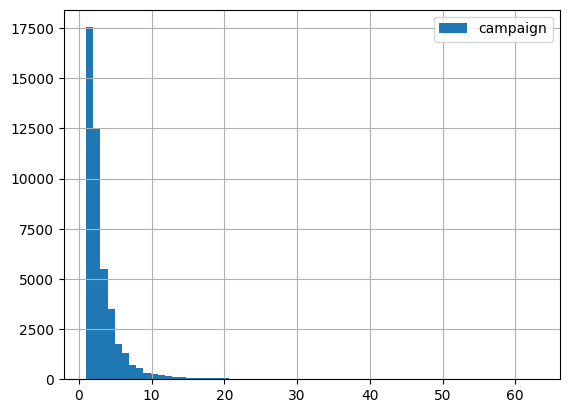

In [29]:
bank_df["campaign"].hist(bins=63, legend = True)

Histograma mostrando solo los valores que tiene valor menor a 20 en la variable

<Axes: >

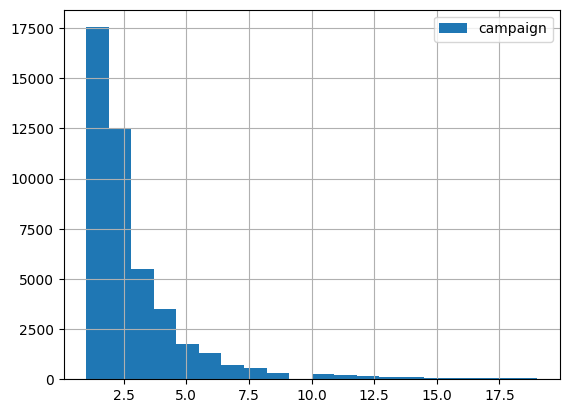

In [30]:
bank_df.loc[bank_df.loc[:,"campaign"] < 20,"campaign"].hist(bins=20, legend=True)

#### Variable duration

Histograma incluyendo todos los valores

<Axes: >

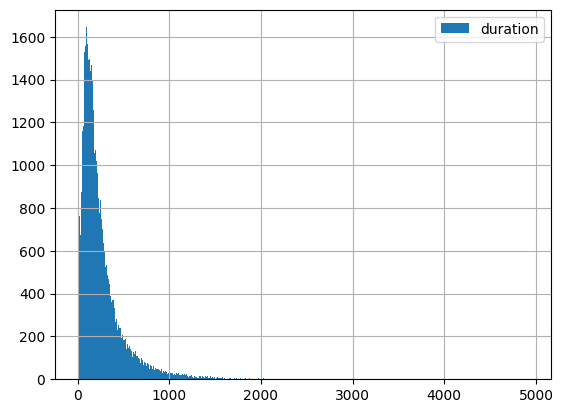

In [31]:
bank_df["duration"].hist(bins=500, legend = True)

Mostrando unicamente los valores menores a 1000

<Axes: >

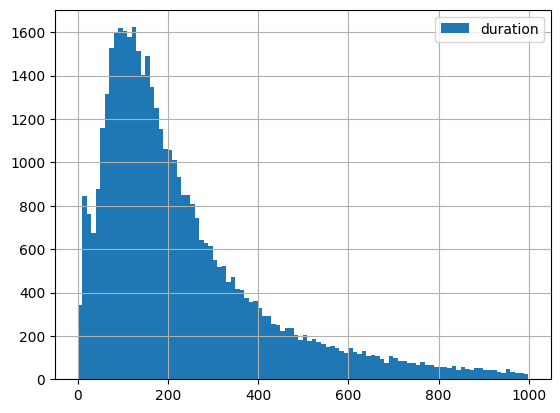

In [32]:
bank_df.loc[bank_df.loc[:,"duration"] < 1000,"duration"].hist(bins=100, legend=True)

#### Variable pdays descartando los valores de -1

<Axes: >

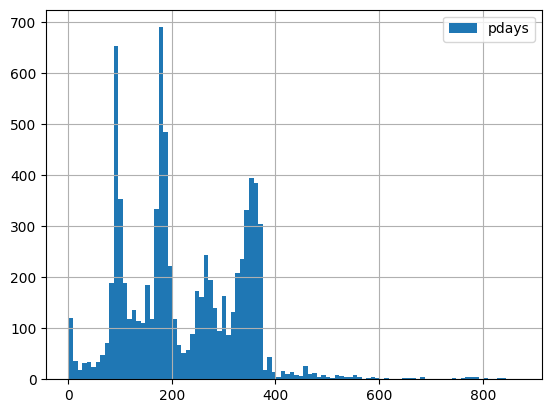

In [33]:
bank_df.loc[bank_df.loc[:,"pdays"] != -1, "pdays"].hist(bins=100, legend=True)

#### Variavle previous

Mostrando todos los datos

<Axes: >

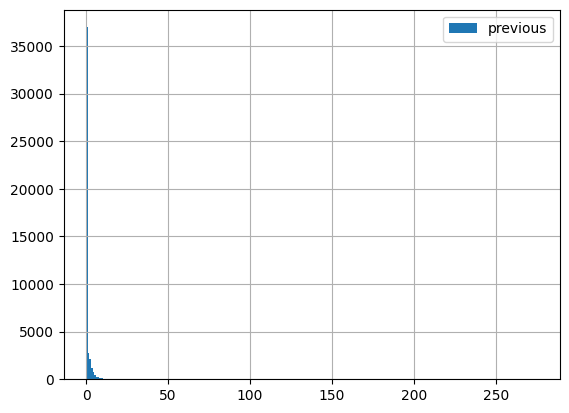

In [34]:
bank_df["previous"].hist(bins=275, legend=True)

Mostrando unicamente los valores menores a 18

<Axes: >

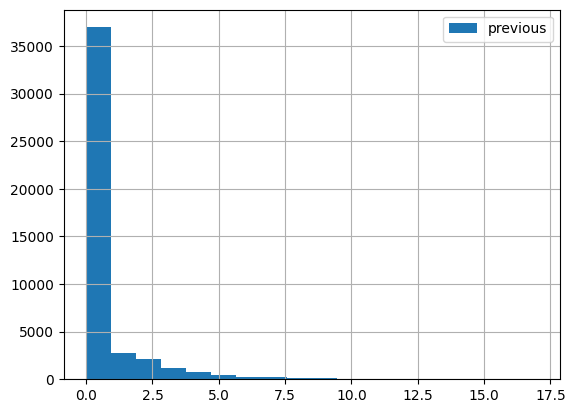

In [35]:
bank_df.loc[bank_df.loc[:,"previous"] < 18, "previous"].hist(bins=18, legend=True)

## Diagramas de caja

###### Variable age

<Axes: >

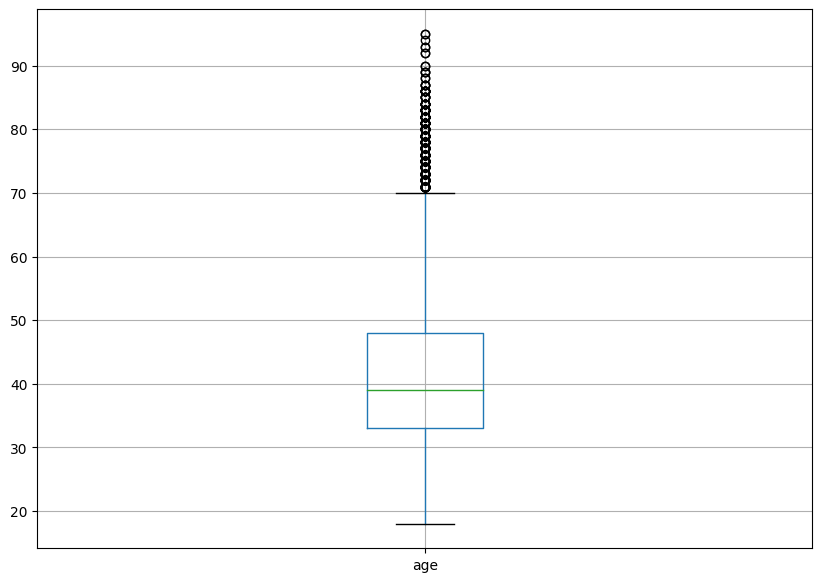

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))
bank_df.loc[:,["age"]].boxplot()

###### Variable balance

<Axes: >

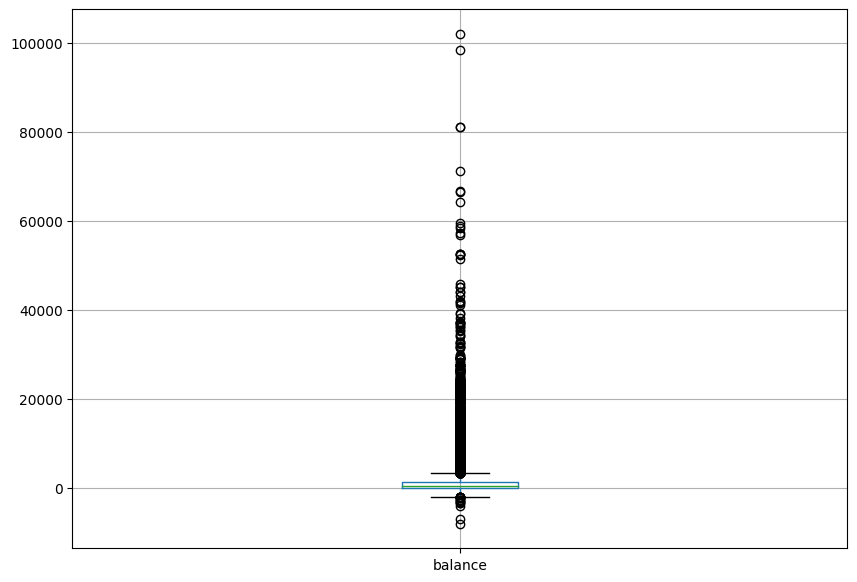

In [37]:
plt.figure(figsize = (10, 7))
bank_df.loc[:,["balance"]].boxplot()

###### Variable duration

<Axes: >

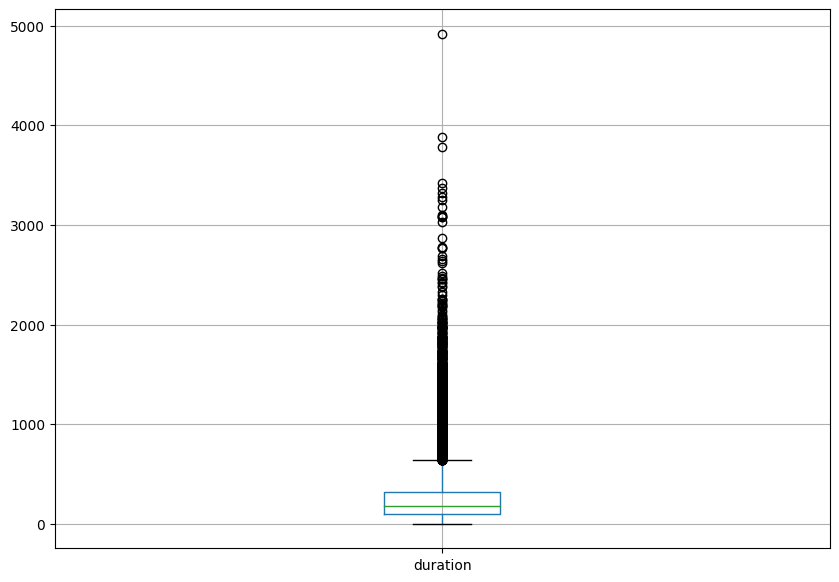

In [38]:
plt.figure(figsize = (10, 7))
bank_df.loc[:,["duration"]].boxplot()

###### Variable campaign

<Axes: >

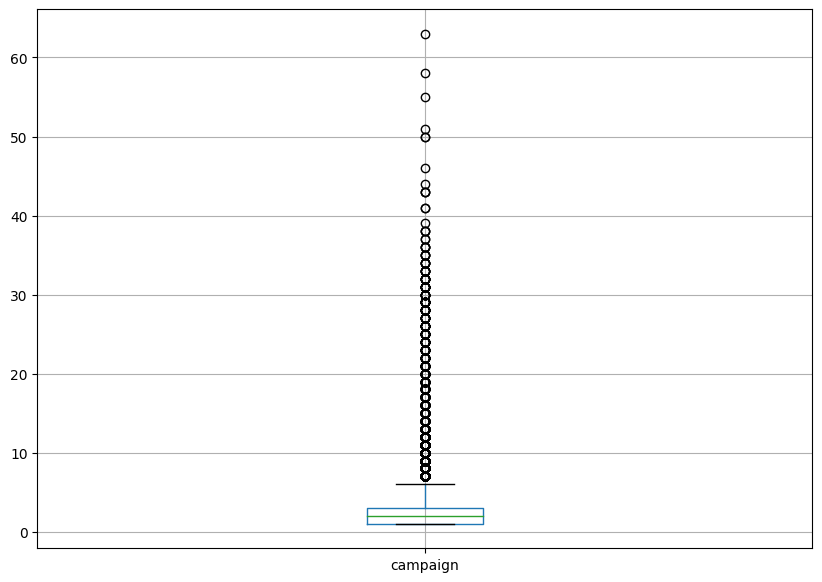

In [39]:
plt.figure(figsize = (10, 7))
bank_df.loc[:,["campaign"]].boxplot()

###### Variable previous

<Axes: >

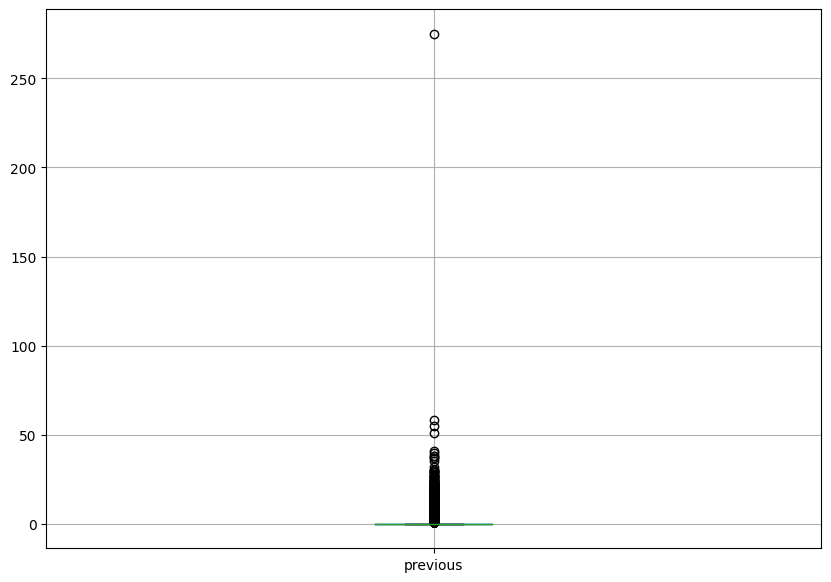

In [40]:
plt.figure(figsize = (10, 7))
bank_df.loc[:,["previous"]].boxplot()

###### Variable pdays
Sin incluir los valores de -1

<Axes: >

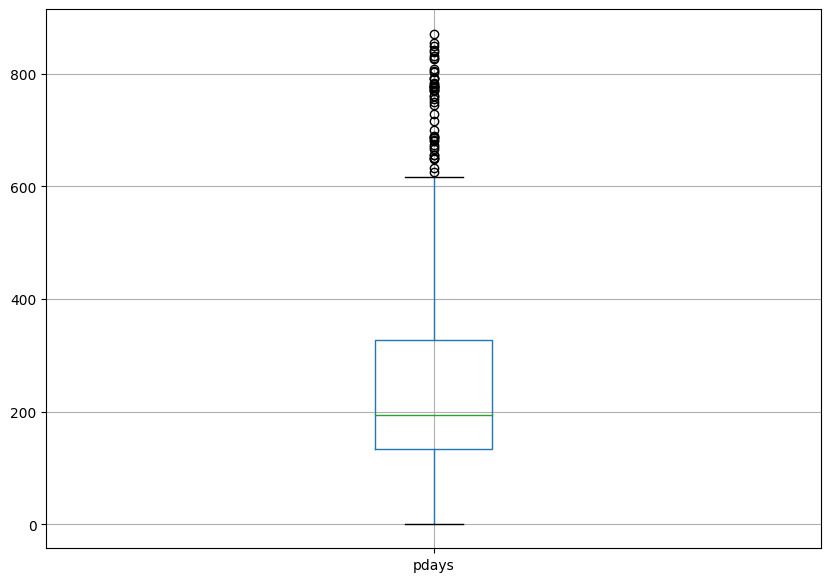

In [41]:
plt.figure(figsize = (10, 7))
bank_df.loc[bank_df["pdays"] != -1,["pdays"]].boxplot()

## Diagramas circulares para las variables categoricas

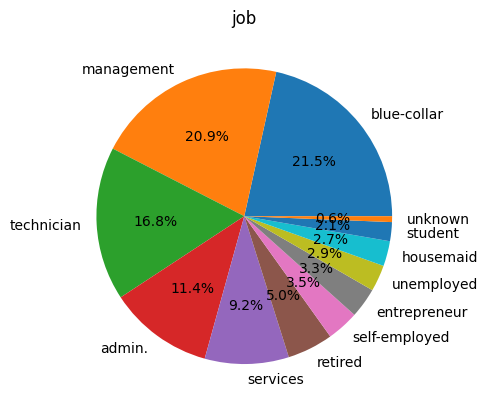

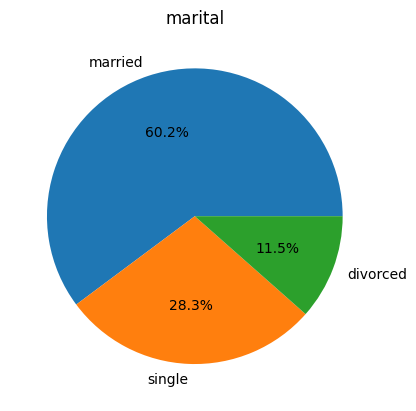

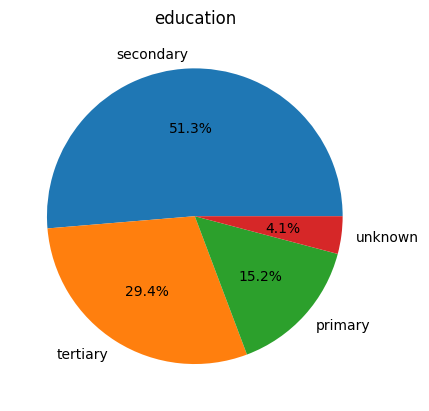

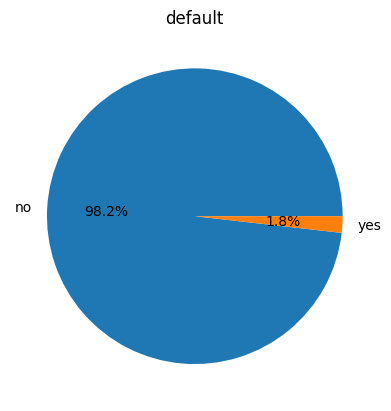

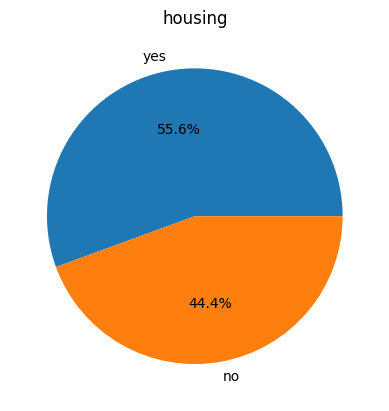

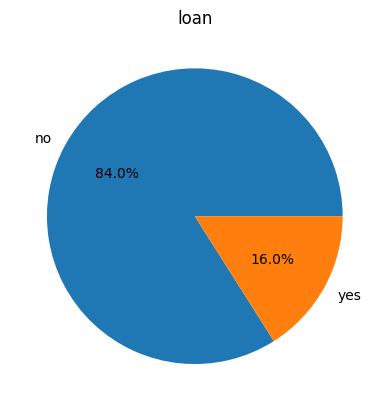

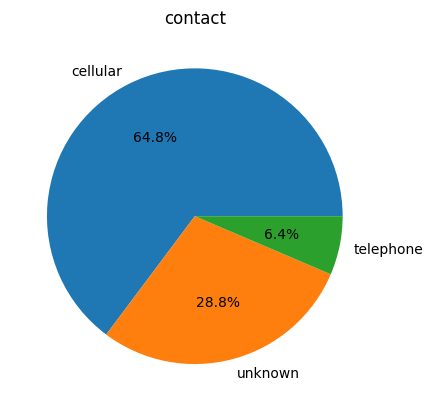

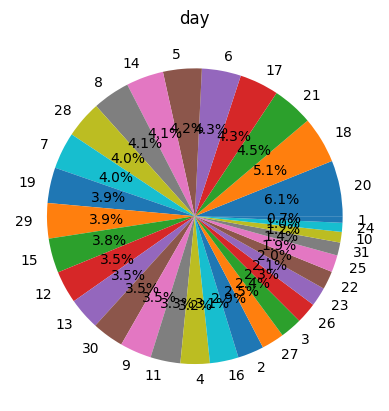

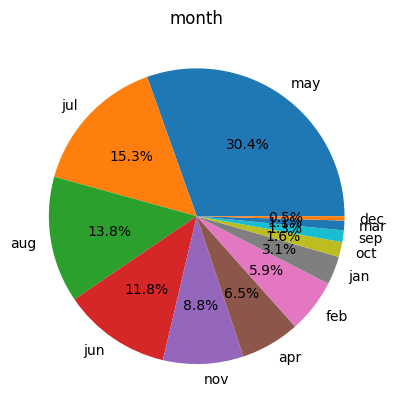

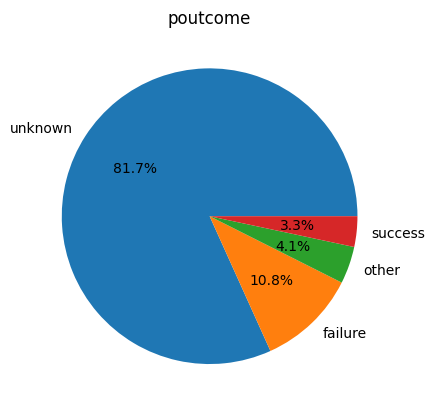

In [42]:
for col in bank_df.loc[:,["job","marital","education","default","housing","loan","contact","day","month","poutcome"]]:
    # Create a pie chart for each column
    bank_df[col].value_counts().plot.pie(autopct='%1.1f%%', ylabel="", title=col)
    # Show the pie chart
    plt.show()

## Diagramas de dispersión para las variables numéricas

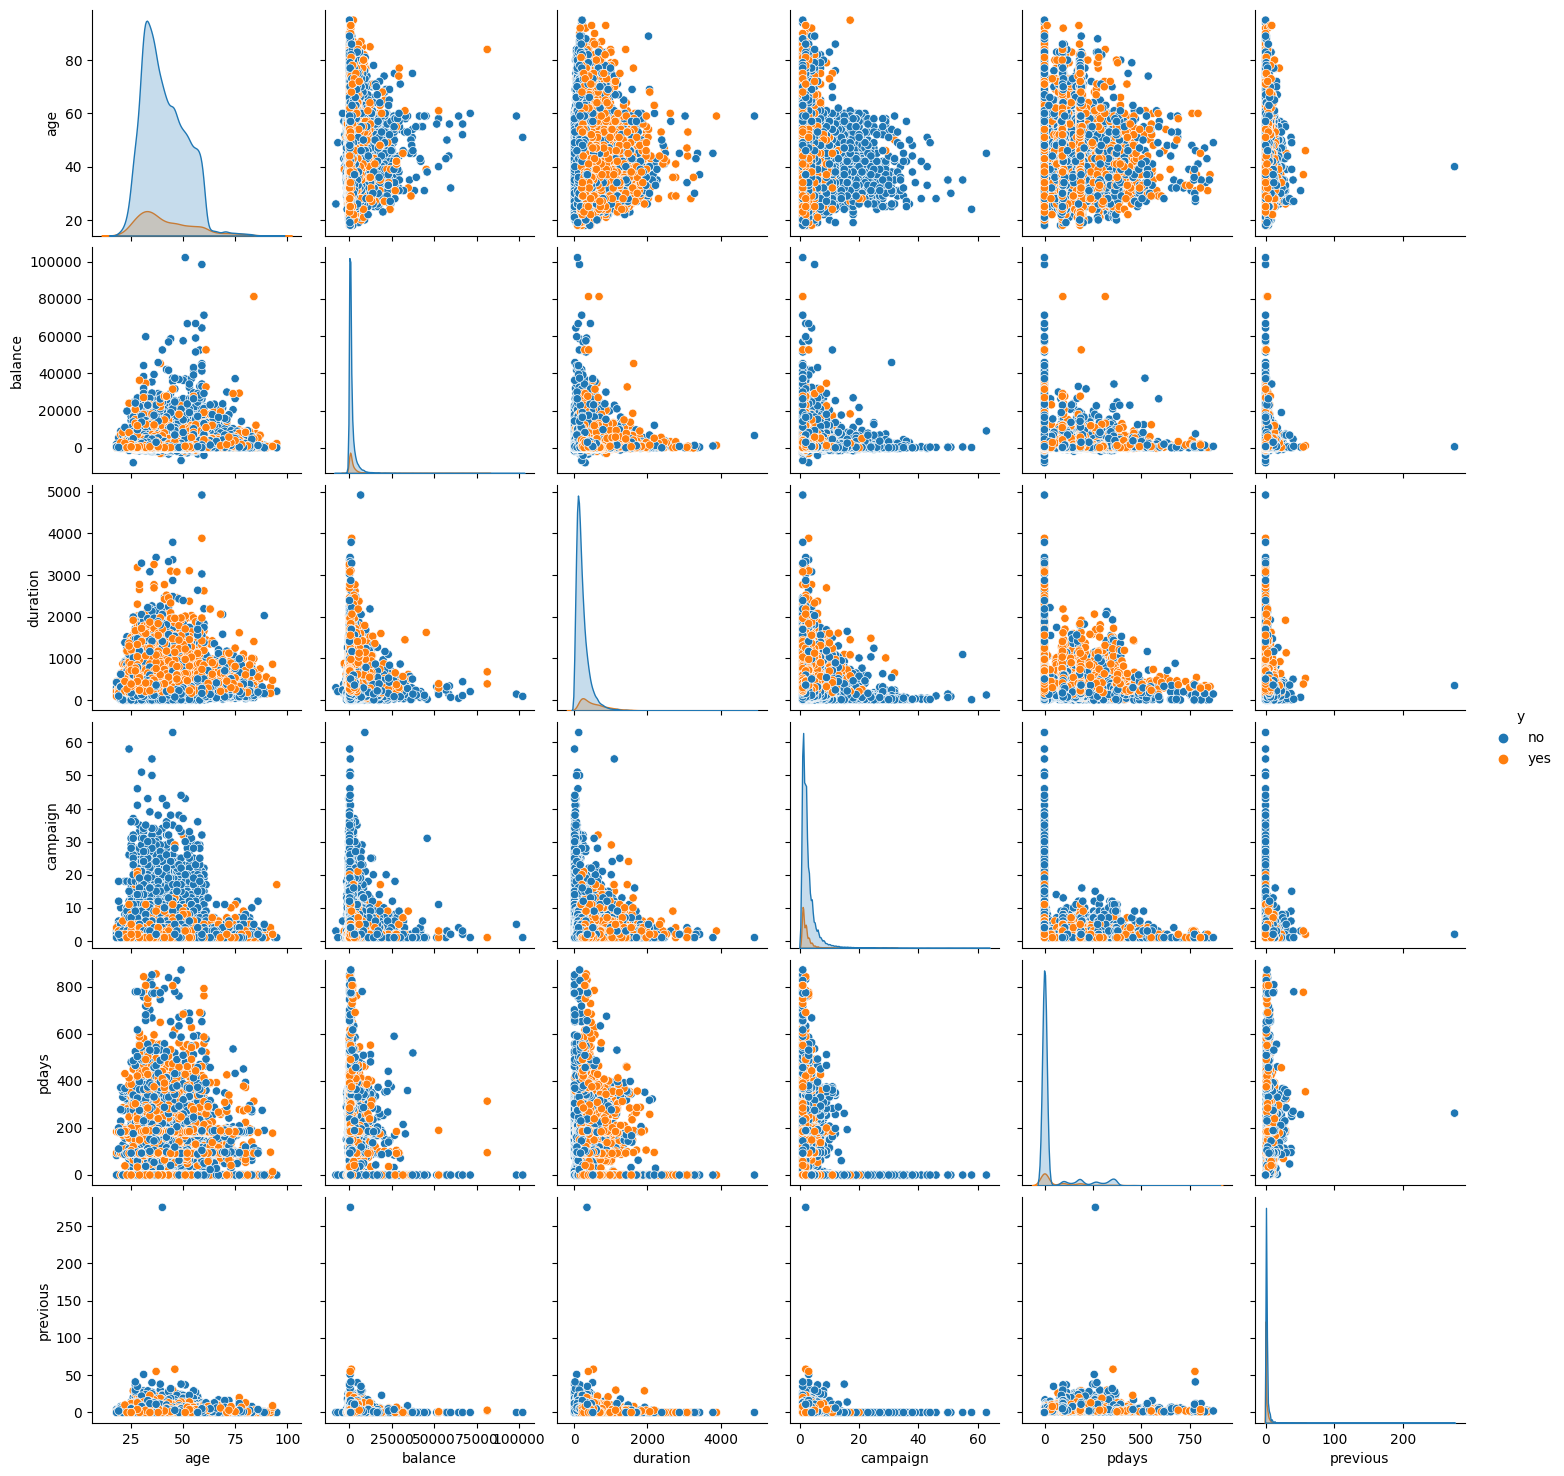

In [43]:
import seaborn as sns
g = sns.pairplot(bank_df[["age","balance","duration","campaign","pdays","previous","y"]], hue="y")